In [1]:
# Importações
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([x for x in range(100)])
data = data.reshape(-1, 1)

In [4]:
data.shape

(100, 1)

In [ ]:
labels = 46 + 2 * data.flatten()

In [ ]:
data.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
labels

array([ 46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,
        72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122,
       124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200,
       202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226,
       228, 230, 232, 234, 236, 238, 240, 242, 244])

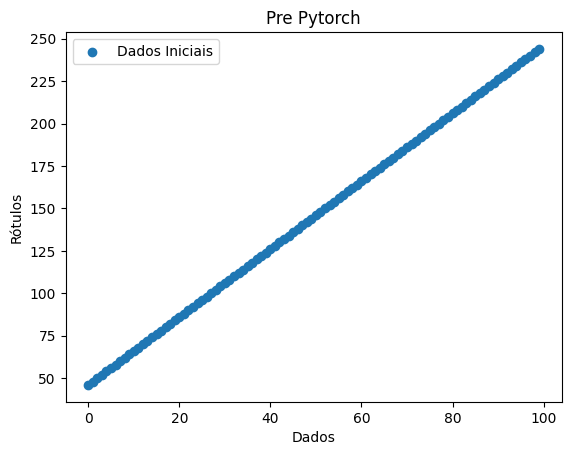

In [ ]:
plt.scatter(data, labels, label="Dados Iniciais")
plt.title('Pre Pytorch')
plt.xlabel('Dados')
plt.ylabel('Rótulos')
plt.legend()
plt.show()

In [ ]:
# Média e Desvio Padrão
data_mean, data_std = data.mean(), data.std()
data_normalized = (data - data_mean) / data_std
data_tensor = torch.tensor(data_normalized, dtype=torch.float32)

In [ ]:
labels_mean, labels_std = labels.mean(), labels.std()
labels_normalized = (labels - labels_mean) / labels_std
labels_tensor = torch.tensor(labels_normalized, dtype=torch.float32)

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, in_features, out_features) :
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)
  def forward(self, x) :
    return self.linear(x).squeeze(1)

In [ ]:
in_features = 1
out_features = 1
model = LinearRegression(in_features, out_features)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
num_epochs = 20

In [ ]:
for epoch in range(num_epochs) :
  outputs = model(data_tensor)
  loss = criterion(outputs, labels_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'Epóca[{epoch + 1}/{num_epochs}] - Erro : {loss.item():.2f}')

Epóca[1/20] - Erro : 0.00
Epóca[2/20] - Erro : 0.00
Epóca[3/20] - Erro : 0.00
Epóca[4/20] - Erro : 0.00
Epóca[5/20] - Erro : 0.00
Epóca[6/20] - Erro : 0.00
Epóca[7/20] - Erro : 0.00
Epóca[8/20] - Erro : 0.00
Epóca[9/20] - Erro : 0.00
Epóca[10/20] - Erro : 0.00
Epóca[11/20] - Erro : 0.00
Epóca[12/20] - Erro : 0.00
Epóca[13/20] - Erro : 0.00
Epóca[14/20] - Erro : 0.00
Epóca[15/20] - Erro : 0.00
Epóca[16/20] - Erro : 0.00
Epóca[17/20] - Erro : 0.00
Epóca[18/20] - Erro : 0.00
Epóca[19/20] - Erro : 0.00
Epóca[20/20] - Erro : 0.00


In [ ]:
new_data = 121
new_data_normalized = (new_data - data_mean) / data_std
new_data_tensor = torch.tensor(new_data_normalized, dtype=torch.float32).view(1,-1)
new_data_tensor

tensor([[2.4770]])

In [ ]:
model.eval()
with torch.no_grad() :
  pred = model(new_data_tensor)
pred_denormalized = pred.item() * labels_std + labels_mean
print(pred_denormalized)

287.96869173911176


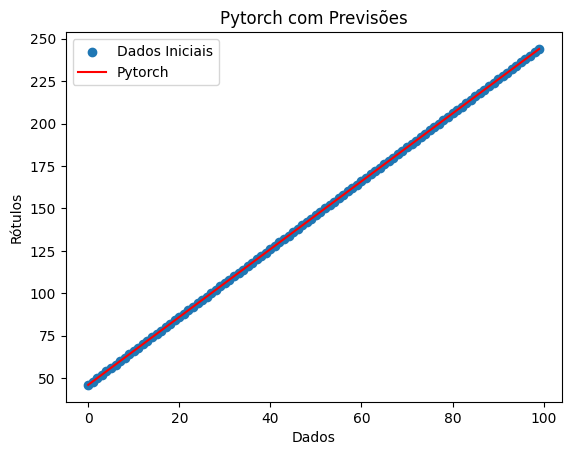

In [ ]:
plt.scatter(data, labels, label="Dados Iniciais")

fit_line = model(data_tensor).detach().numpy() * labels_std + labels_mean
plt.plot(data, fit_line, 'r', label="Pytorch")

plt.title('Pytorch com Previsões')
plt.xlabel('Dados')
plt.ylabel('Rótulos')
plt.legend()
plt.show()